<a href="https://colab.research.google.com/github/zoetice/data-science/blob/main/Zoe_TiceU3Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the true average of the amount of characters in a given *Bluey* episode? How many can we expect in the next episode?

In [ ]:
!pip install "preliz[full,notebook]"

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

**Context**

*Bluey* is an Australian animated television series that has aired for 3 seasons so far, with around 52 epsiodes a season. The show follows anthropomorphic dogs including the title character Bluey, who is a six year old blue heeler. Episodes can range from just a one on one between characters to a whole party of characters, so I wanted to figure out the average amount of characters in each episode to see if I could predict how many would be in the next one.

**DATA**

In [ ]:
url_bluey = "https://raw.githubusercontent.com/zoetice/data-science/refs/heads/main/bluey%20characters%20-%20Sheet1.csv"

In [ ]:
data_bluey = pd.read_csv(url_bluey)

In [ ]:
data_bluey

,5
0,3
1,6
2,4
3,6
4,4
...,...
148,3
149,33
150,4
151,58


(array([111.,  24.,   7.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 3. ,  8.5, 14. , 19.5, 25. , 30.5, 36. , 41.5, 47. , 52.5, 58. ]),
 <BarContainer object of 10 artists>)

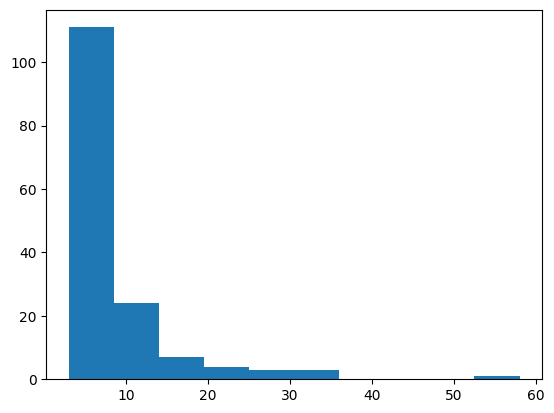

In [ ]:
plt.hist(data_bluey)

**Average guess:**

mean: 7

variation: 5

skew: 0.5

kurtosis: 5

**Priors:**

<Axes: >

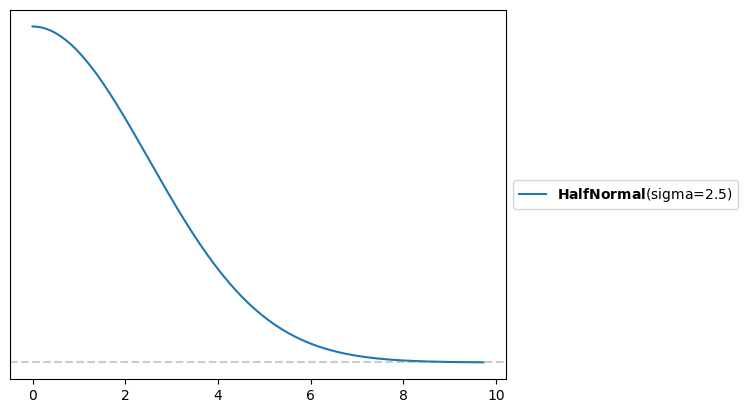

In [ ]:
pz.HalfNormal(sigma=2.5).plot_pdf()

<Axes: >

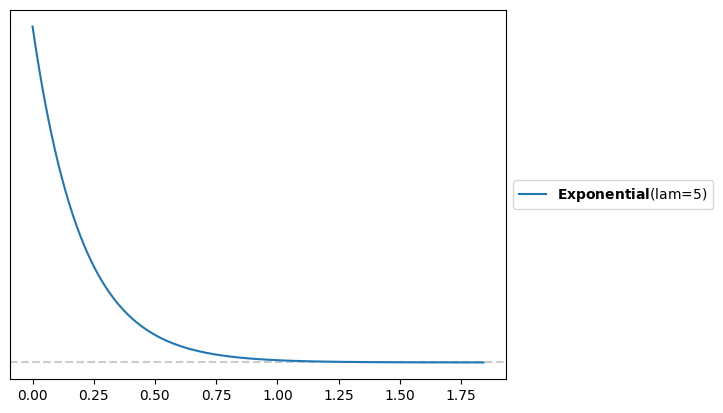

In [ ]:
pz.Exponential(lam=5).plot_pdf()

**Likelihood:**

This likelihood was chosen based on matching it to the data and picking a similar distribution

<Axes: >

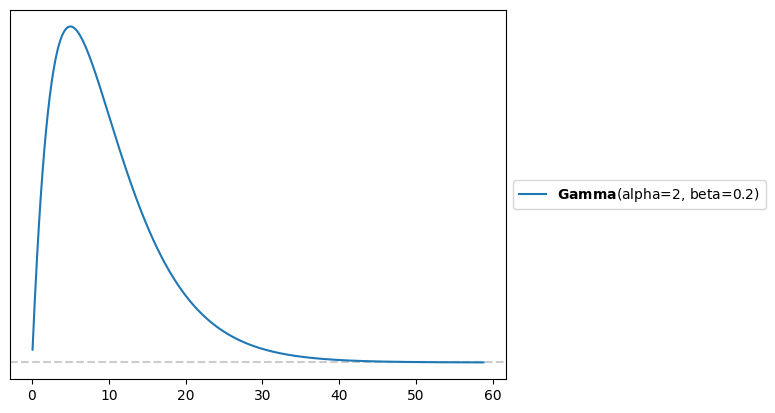

In [ ]:
pz.Gamma(alpha=2, beta = .2).plot_pdf()

**Posterior:**

In [ ]:
#N for normal
with pm.Model() as model_bluey:
   μ = pm.HalfNormal('μ', sigma=2.5)
   σ = pm.Exponential('σ', lam=5)
   Y = pm.Gamma('Y', alpha=2, beta = .2, observed=data_bluey)
   idata_bluey=pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_bluey, model=model_bluey, extend_inferencedata=True)

<Axes: xlabel='Y'>

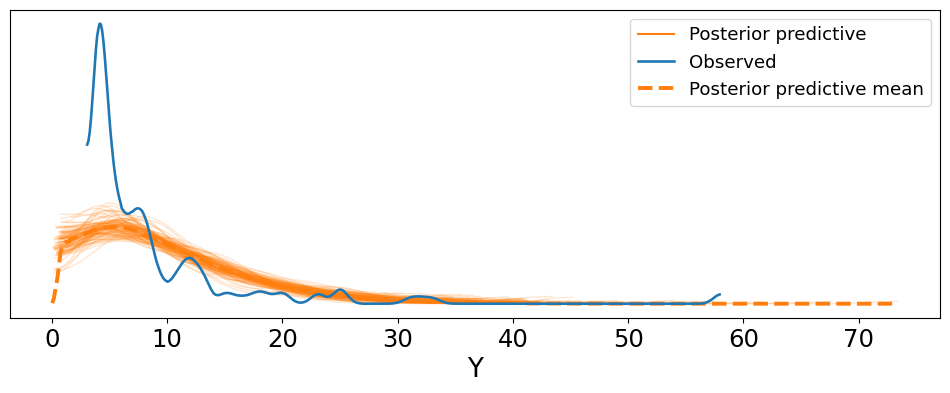

In [ ]:
az.plot_ppc(idata_bluey, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Evidently, this likihood was not accurate to the data, so I will try again with a different distribution

<Axes: >

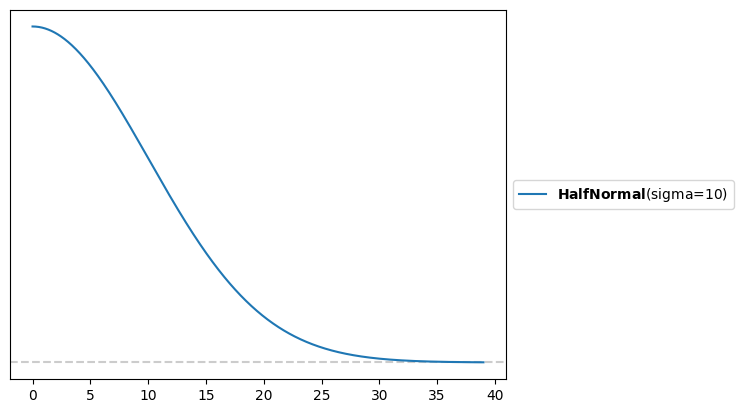

In [ ]:
pz.HalfNormal(sigma=10.026513099).plot_pdf()

<Axes: >

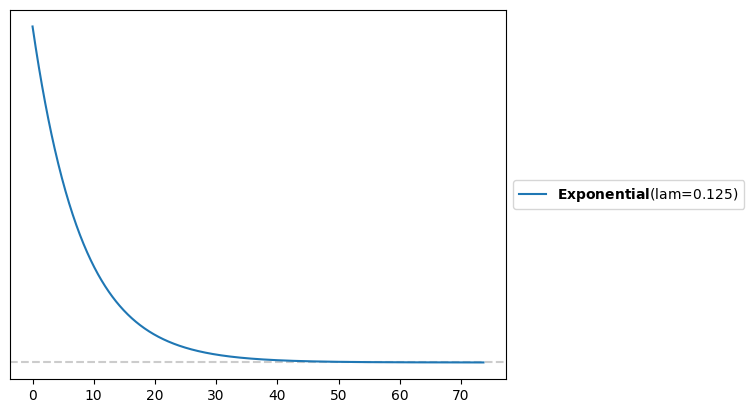

In [ ]:
pz.Exponential(lam=.125).plot_pdf()

<Axes: >

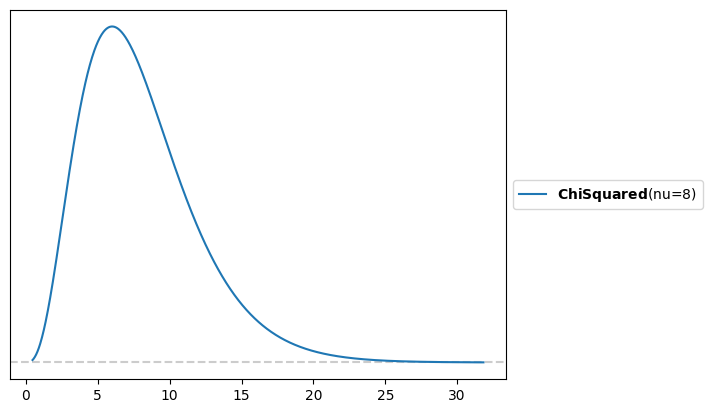

In [ ]:
pz.ChiSquared(nu=8).plot_pdf()


In [ ]:
#N for normal
with pm.Model() as model_bluey2:
   μ = pm.HalfNormal('μ', sigma=10.026513099)
   σ = pm.Exponential('σ', lam=.125)
   Y = pm.ChiSquared('Y', nu=8, observed=data_bluey)
   idata_bluey=pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_bluey, model=model_bluey2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

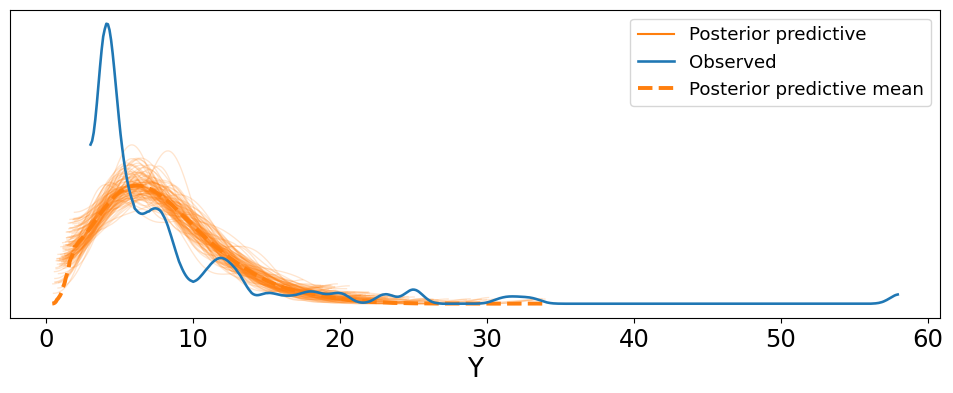

In [ ]:
az.plot_ppc(idata_bluey, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Try #3:

<Axes: >

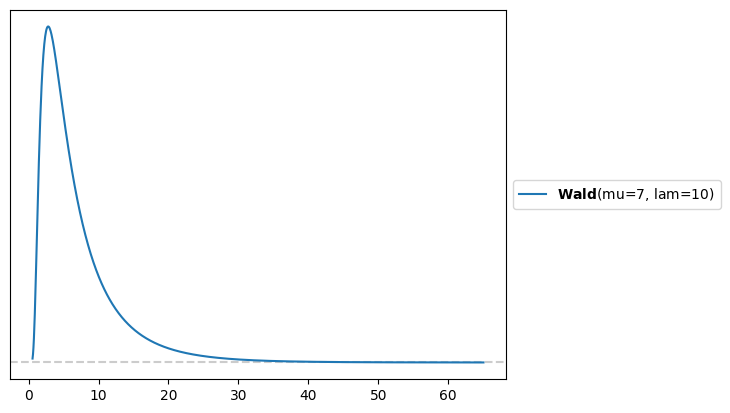

In [ ]:
pz.Wald(mu=7, lam=10).plot_pdf()

In [ ]:
pz.HalfNormal(sigma=8.775).mean()


np.float64(7.001437021045145)

<Axes: >

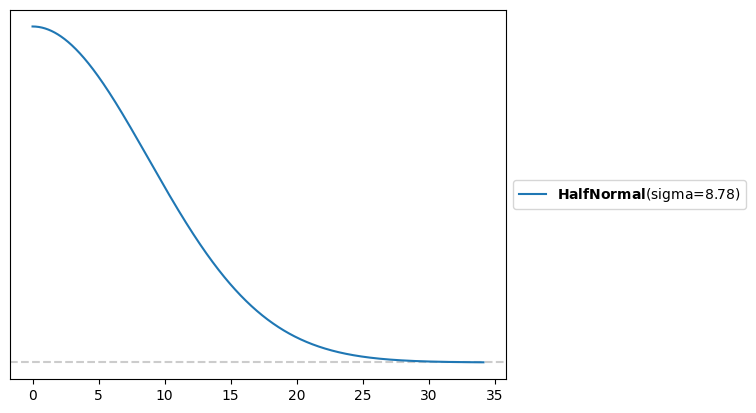

In [ ]:
pz.HalfNormal(sigma=8.775).plot_pdf()

<Axes: >

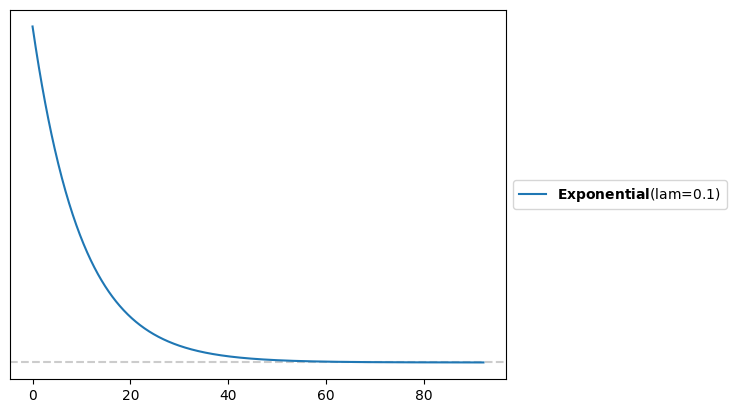

In [ ]:
pz.Exponential(lam=.1).plot_pdf()

In [ ]:
pz.Exponential(lam=.1).mean()

np.float64(10.0)

In [ ]:
#N for normal
with pm.Model() as model_bluey3:
   μ = pm.HalfNormal('μ', sigma=8.775)
   σ = pm.Exponential('σ', lam=.1)
   Y = pm.Wald('Y', mu=7, lam=10, observed=data_bluey)
   idata_bluey=pm.sample()

Output()

ERROR:pymc.stats.convergence:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
pm.sample_posterior_predictive(idata_bluey, model=model_bluey3, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

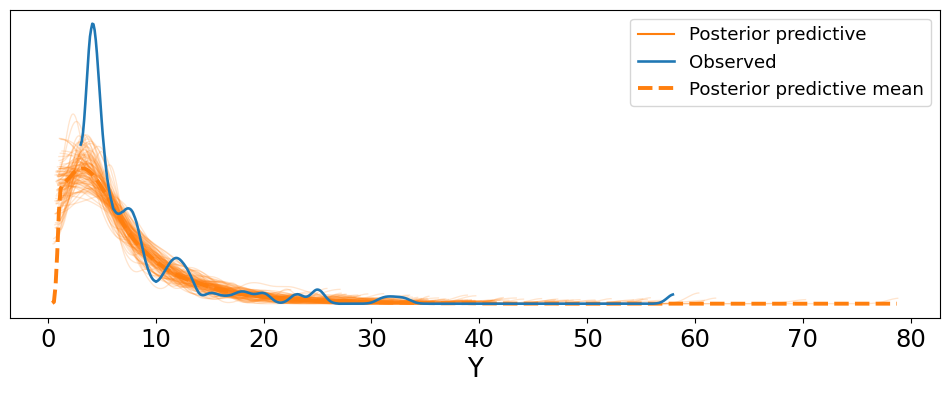

In [ ]:
az.plot_ppc(idata_bluey, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Try #4:

right now the goal is to get the likeihood higher in the beginning

<Axes: >

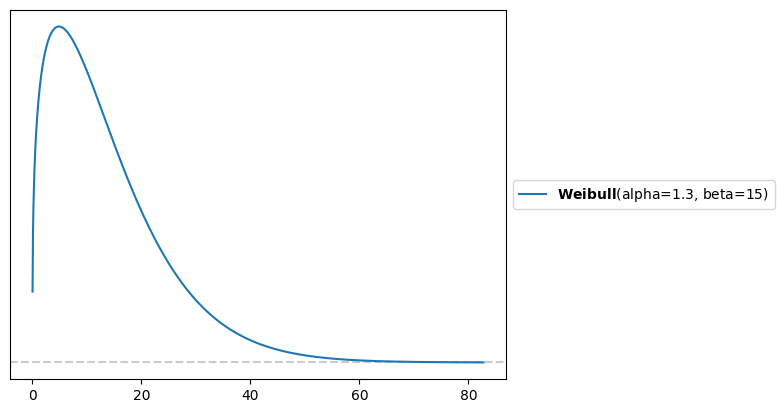

In [ ]:
pz.Weibull(alpha=1.3, beta=15).plot_pdf()

In [ ]:
pz.HalfNormal(sigma=1.63).mean()

np.float64(1.3005518341086708)

<Axes: >

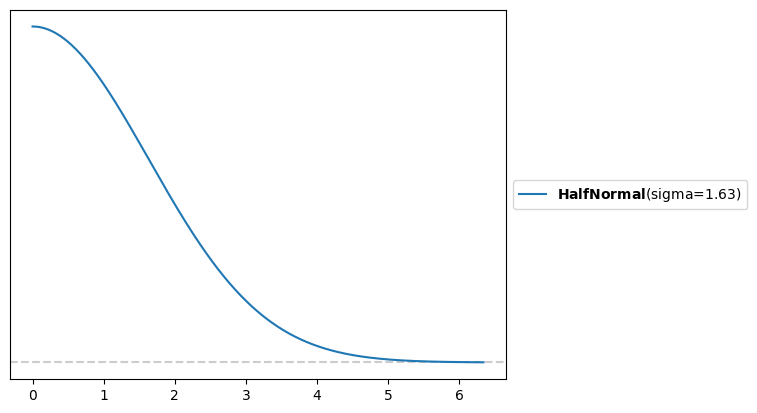

In [ ]:
pz.HalfNormal(sigma=1.63).plot_pdf()

In [ ]:
pz.Exponential(lam=.06666666666666666).mean()

np.float64(15.0)

<Axes: >

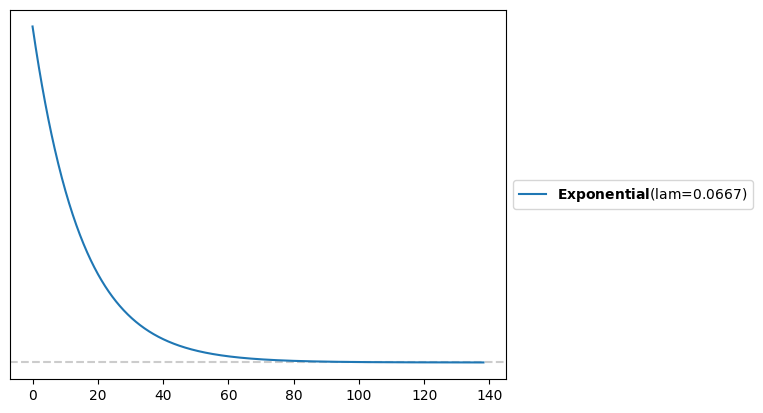

In [ ]:
pz.Exponential(lam=.06666666666666666).plot_pdf()

In [ ]:
#N for normal
with pm.Model() as model_bluey4:
   μ = pm.HalfNormal('μ', sigma=1.63)
   σ = pm.Exponential('σ', lam=.06666666666666666)
   Y = pm.Weibull('Y',alpha=1.3, beta=15, observed=data_bluey)
   idata_bluey=pm.sample()

Output()

In [ ]:
pm.sample_posterior_predictive(idata_bluey, model=model_bluey4, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

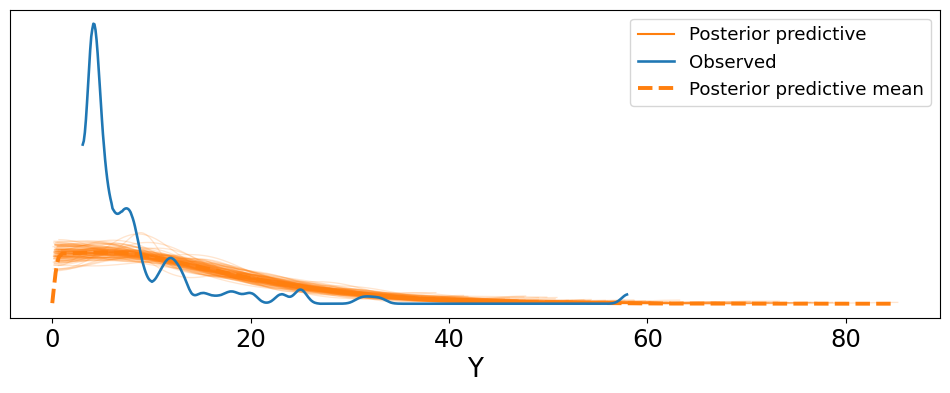

In [ ]:
az.plot_ppc(idata_bluey, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Try #5

<Axes: >

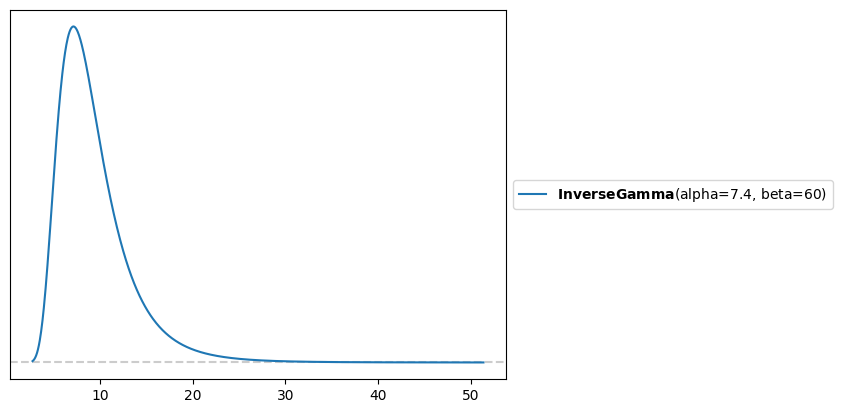

In [ ]:
pz.InverseGamma(alpha=7.4, beta=60).plot_pdf()

In [ ]:
pz.HalfNormal(sigma=9.275).mean()


np.float64(7.400379301446578)

<Axes: >

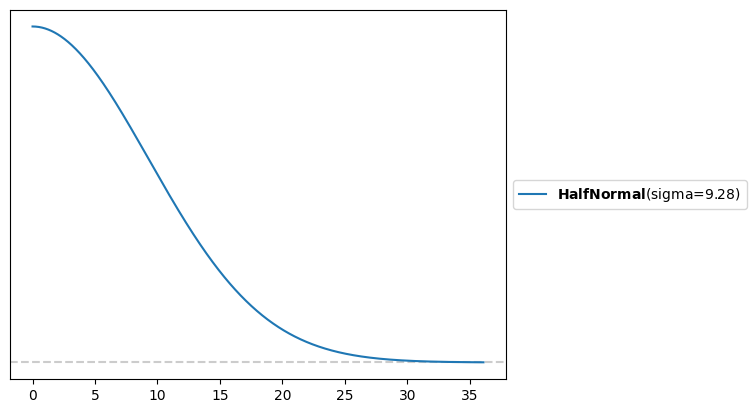

In [ ]:
pz.HalfNormal(sigma=9.275).plot_pdf()

In [ ]:
pz.Exponential(lam=.01665).mean()

np.float64(60.06006006006005)

<Axes: >

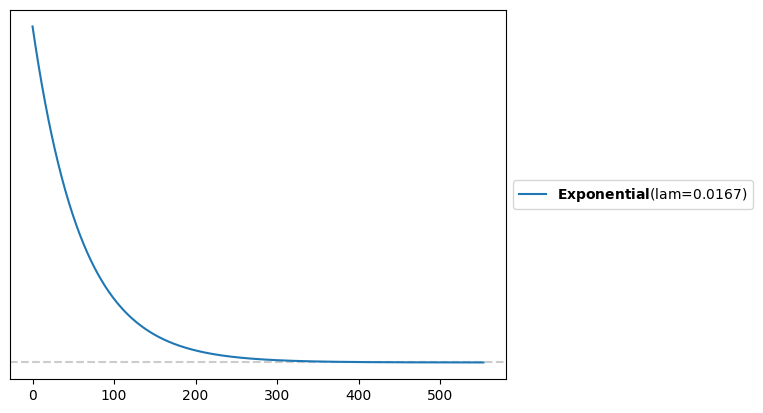

In [ ]:
pz.Exponential(lam=.01665).plot_pdf()

In [ ]:
#N for normal
with pm.Model() as model_bluey5:
   μ = pm.HalfNormal('μ', sigma=9.275)
   σ = pm.Exponential('σ', lam=.01665)
   Y = pm.InverseGamma('Y',alpha=7.4, beta=60, observed=data_bluey)
   idata_bluey=pm.sample()

Output()

In [ ]:
pm.sample_posterior_predictive(idata_bluey, model=model_bluey5, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

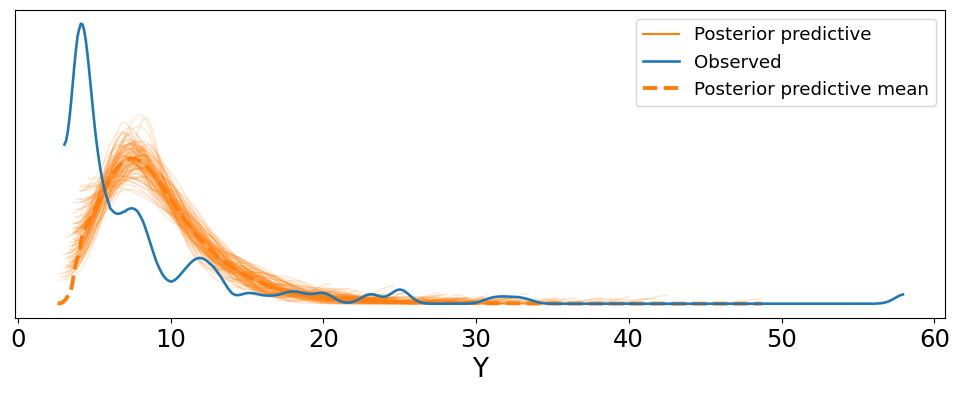

In [ ]:
az.plot_ppc(idata_bluey, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Try #6

<Axes: >

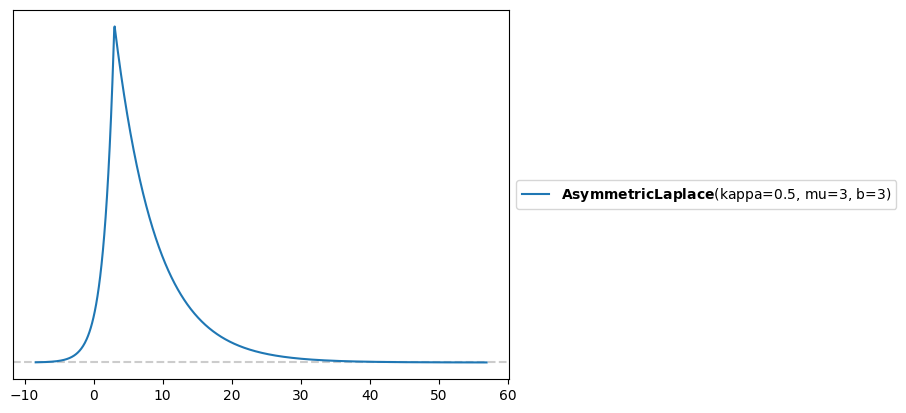

In [ ]:
pz.AsymmetricLaplace(kappa=.5, mu=3, b=3).plot_pdf()

In [ ]:
pz.HalfNormal(sigma=0.627).mean()

np.float64(0.5002736196233967)

<Axes: >

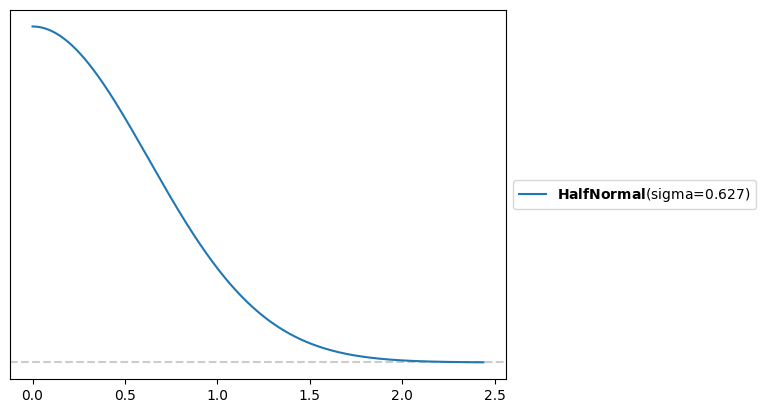

In [ ]:
pz.HalfNormal(sigma=0.627).plot_pdf()

In [ ]:
pz.Exponential(lam=.333333333333333333).mean()

np.float64(3.0)

<Axes: >

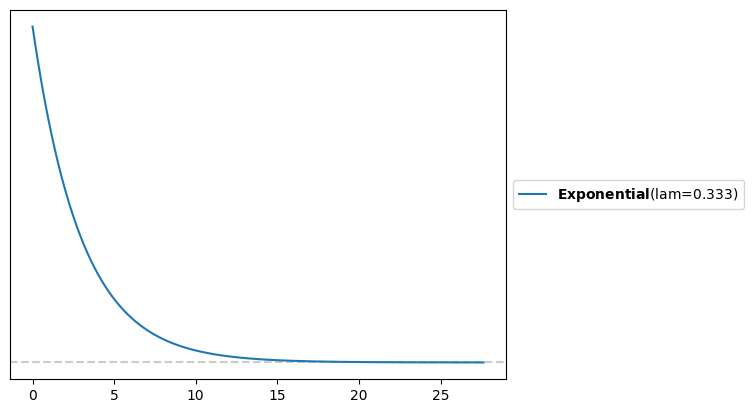

In [ ]:
pz.Exponential(lam=.333333333333333333).plot_pdf()

In [ ]:
#N for normal
with pm.Model() as model_bluey6:
   μ = pm.HalfNormal('μ', sigma=.627)
   σ = pm.Exponential('σ', lam=.333333333333333333)
   Y = pm.AsymmetricLaplace('Y', kappa=.5, mu=3, b=3, observed=data_bluey)
   idata_bluey=pm.sample()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
pm.sample_posterior_predictive(idata_bluey, model=model_bluey6, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

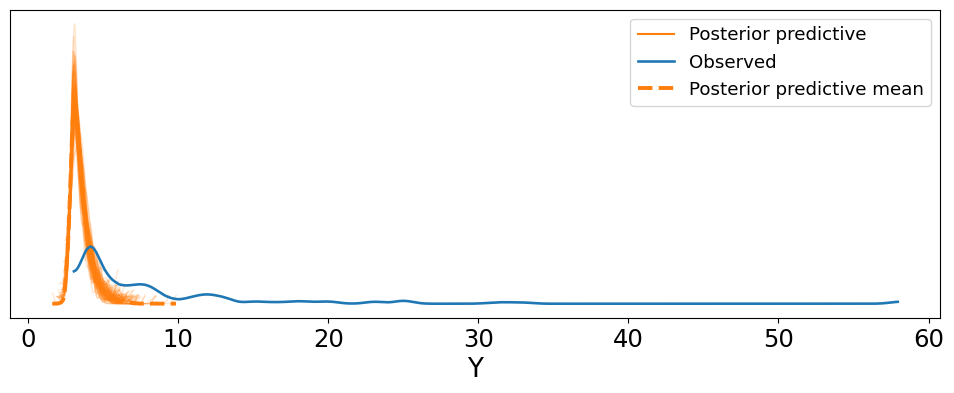

In [ ]:
az.plot_ppc(idata_bluey, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This one is too high...

**Conclusion:**

Along with these trials I tested every other distribution that could and found that the data didn't really match any of them, but that my 3rd try was the closest, only not accounting for the spike at 4.